<a href="https://colab.research.google.com/github/phisan-chula/Construction_Survey/blob/main/GeodComp_BasicCommand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**การใช้สคริปซ์ (script) ในการคำนวนงานรังวัดสำรวจ**<br>
รศ.ดร.ไพศาล สันติธรรมนนท์<br>
คณะวิศวกรรมศาสตร์ จุฬาลงกรณ์มหาวิทยาลัย<br>
email : phisan.chula@gmail.com<br>
<br>
การใช้คำสั่ง GeographicLib ผ่าน Colab VM<br>
ลักษณะเดียวกันผู้ใช้สามารถติดตั้ง GeographicLib บนวินโดว์ แม็คบุค <br>
https://sourceforge.net/projects/geographiclib/files/distrib/



#**1) การแปลงปริมาณมุม Decimail Degree (DD) ไปเป็น Deg-Min-Sec (DMS) และแปลงกลับ**



In [12]:
#%%capture
! apt-get install geographiclib-tools
! pip install PyGeodesy
! pip install pyproj

Reading package lists... Done
Building dependency tree       
Reading state information... Done
geographiclib-tools is already the newest version (1.49-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from pygeodesy import dms

print( dms.toDMS( 120.4567890123 , prec=9 ) )

print(  dms.parseDMS( '   120°27′24.44044428″  ' ) )
print( dms.parseDMS( '   120:27:24.44044428  ', sep=':' ) )

120°27′24.44044428″
120.4567890123
120.4567890123


#**2)  การแปลงระบบพิกัด ECEF (XYZ) และพิกัดยีออเดติกซ์ ( ϕ λ h )** 

In [14]:
! CartConvert --input-string "14.0000 100.0000 10.000"

-1074865.112613 6095862.971702 1532984.248725


In [15]:
! CartConvert -r --input-string "-1074865.112613 6095862.971702 1532984.248725"

14.00000000000 100.00000000000 10.000000


#**3) การแปลงผลต่างค่าพิกัด ECEF(XYZ)1 ไปยัง ECEF(XYZ)2 ไปสู่ระบบพิกัดท้องถิ่น East-North-Up (ENU)**

In [16]:
! CartConvert -l 14.00000   100.00000 10.000     --input-string "14.0001   100.0002   10.300"
! CartConvert -l 14:00:00    100:00:00   10.000   --input-string "14:00:00.1    100:00:00.2    10.300 "

21.606824 11.063956 0.299954
6.001897 3.073319 0.299996


#**4) การแปลงค่าพิกัดในระบบยูทีเอ็ม <br>**
ออฟชั่น -p 9   แสดงทศนิยม 9 ตำแหน่ง<br>
ออฟชั่น -c   คำนวณ meridian convergence และ scale factor<br>

In [17]:
! GeoConvert  -p 9  --input-string "47N 500000  1500000"
! GeoConvert  -: -p 6   --input-string "47N 500000  1500000"


13.56845127846726 99.00000000000000
13:34:06.4246025N 099:00:00.0000000E


In [18]:
! GeoConvert -u -p 3 --input-string "13.56845127846726 99.00000000000000"
! GeoConvert -u  -p 3 --input-string "13:34:06.4246025N 099:00:00.0000000E"
! GeoConvert -u  -p 3 --input-string "13.738403574697129, 100.5320703868256"

47n 500000.000 1500000.000
47n 500000.000 1500000.000
47n 665652.544 1519321.421


In [19]:
! GeoConvert  -c   --input-string "47N 500000  1500000"
! GeoConvert  -c   --input-string "13:34:06.4246025N 099:00:00.0000000E"

0.00000 0.9996000
0.00000 0.9996000


#**4) การแปลงค่าพิกัด Military Grid Referece System**<br>

---


ระบบพิกัดมีความยืดหยุ่นปรับความละเอียดเชิงพื้นที่ได้<br>
กำหนดใช้ในการระบุพืนที่การปกครอง ของ กรมการปกครอง<br>
อ้างอิง  https://en.wikipedia.org/wiki/Military_Grid_Reference_System<br>

In [20]:
! GeoConvert -m  -p -3  --input-string "47N 500000  1500000"
! GeoConvert -m  -p 0   --input-string "47N 500000  1500000"
! GeoConvert -m  -p +1   --input-string "47N 500000  1500000"

47PNR0000
47PNR0000000000
47PNR000000000000


# **5) การคำนวนเส้น ยีออเดซิก (geodetic line)**<br>
*ปัญหาคำนวนทางตรง (direct problem)* <br>
มีค่าพิกัด phi1, lam1 , faz1, s12<br>
*ปัญหาคำนวนย้อน  (indirect/ inverse problem)*<br>
มึค่าพิกัด phi1,lam1, phi2,lam2<br>
ต้องการหา  faz1, faz2, s12<b4>


In [21]:
! GeodSolve -i --input-string "14.00000N 100.00000E 15.00000000N 101.0000000E"
! GeodSolve -i --input-string "14:00:00.00000 100:00:00.0000 15:00:00.00000 101:00:00.000000"

44.12901926 44.37941483 154472.518
44.12901926 44.37941483 154472.518


In [22]:
! GeodSolve -i  -d --input-string "14.00000N 100.00000E 15.00000000N 101.0000000E"
! GeodSolve -i  -d  --input-string "14:00:00.00000 100:00:00.0000 15:00:00.00000 101:00:00.000000"

044d07'44.4693" 044d22'45.8934" 154472.518
044d07'44.4693" 044d22'45.8934" 154472.518


#**6)  การแปลงค่าระดับจาก Orthometric Height ไปมาสู่ Ellipsoidal Height**<br>
แบบจำลอง TGM2017 สามารถติดตั้งได้ บนเครื่อง PC ส่วนตน</br>
hae = height above ellipsoid</br>
msl = mean sea level (orthometric height)

In [23]:
%%capture
from google.colab import drive
drive.mount('/content/drive')
! apt-get install geographiclib-tools
! mkdir -p /usr/share/GeographicLib/geoids
! cp /content/drive/MyDrive/Geodesy_Cache/tgm2017-1.pgm   /usr/share/GeographicLib/geoids/tgm2017-1.pgm

In [24]:
! GeoidEval -n tgm2017-1 --input-string "14 100"
! GeoidEval -n tgm2017-1 --msltohae  --input-string "14 100  1.5"
! GeoidEval -n tgm2017-1 --haetomsl  --input-string "14 100  -30.7867"

-32.2897
14 100  -30.7897
14 100  1.5030


In [25]:
! GeoidEval -n tgm2017-1 --input-string "47n 665652.544 1519321.421"
! GeoidEval -n tgm2017-1  --msltohae  --input-string "47n 665652.544 1519321.421  1.500"
! GeoidEval -n tgm2017-1  --haetomsl  --input-string "47n 665652.544 1519321.421  -28.9537"

-30.4537
47n 665652.544 1519321.421  -28.9537
47n 665652.544 1519321.421  1.5000


#**8) การคำนวน ปัญหาไปข้างหน้า และ ปัญหาย้อนกลับ**<br>

In [42]:
from pyproj import Geod
g = Geod(ellps='WGS84')
DMK = [13.9255,100.5923] ; BKK = [13.6900,100.7501]
az12, az21, dist = g.inv( DMK[1],DMK[0], BKK[1], BKK[0] )
print( 'Azimuth DMK->BKK :',dms.toDMS( az12 , prec=2 ) )
print( 'Azimuth BKK->DMK :',dms.toDMS( az21 , prec=2 ) )
print( f'Distance : {dist:.3f} meter.')
#########################################################
endllon, endlat, backaz = g.fwd(  DMK[1],DMK[0], az12, dist )
backaz = dms.toDMS( backaz , prec=2 )
print( f'Calculatin BKK : lat={endlat:.4f} lon={endllon:.4f} , az={backaz} ')

Azimuth DMK->BKK : 146°45′46.51″
Azimuth BKK->DMK : -33°11′57.91″
Distance : 31144.445 meter.
Calculatin BKK : lat=13.6900 lon=100.7501 , az=-33°11′57.91″ 


#**9) พื้นที่ยีออเดซิกส์**<br>

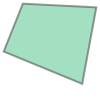

In [50]:
from shapely import wkt
from pyproj import Geod
g = Geod(ellps='WGS84')
WKT = "POLYGON ((100.538464 13.734464, 100.5365113 13.7295864, 100.544515 13.7262929, 100.5459527 13.7340888, 100.538464 13.734464))"
poly = wkt.loads(WKT)
poly

In [56]:
area,peri = g.geometry_area_perimeter( poly )
print( f'geodetic area = {area:,.1f} sq.m')

geodetic area = 624,584.3 sq.m


#**10) รัศมีโลกบนพื้นผิวทรงรีชนิดต่างๆ**<br>

In [ ]:
import pygeodesy as pgd

print( pgd.Ellipsoids.GRS80.toStr() )
print( pgd.Ellipsoids.WGS84.toStr() )

print( pgd.Ellipsoids.WGS84.rocPrimeVertical(lat=45) )
print( pgd.Ellipsoids.WGS84.rocMeridional(lat=45)  )
print( pgd.Ellipsoids.WGS84.rocGauss(lat=45)  )
print( pgd.Ellipsoids.WGS84.rocBearing( 45, 10 )  )   # at latitude , azimut 0...360